In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import tifffile as tiff
import tensorflow as tf
import rasterio
from rasterio.mask import mask
from rasterio.transform import from_origin

In [2]:
metrics=pd.read_excel('../results/metric_values.xlsx')

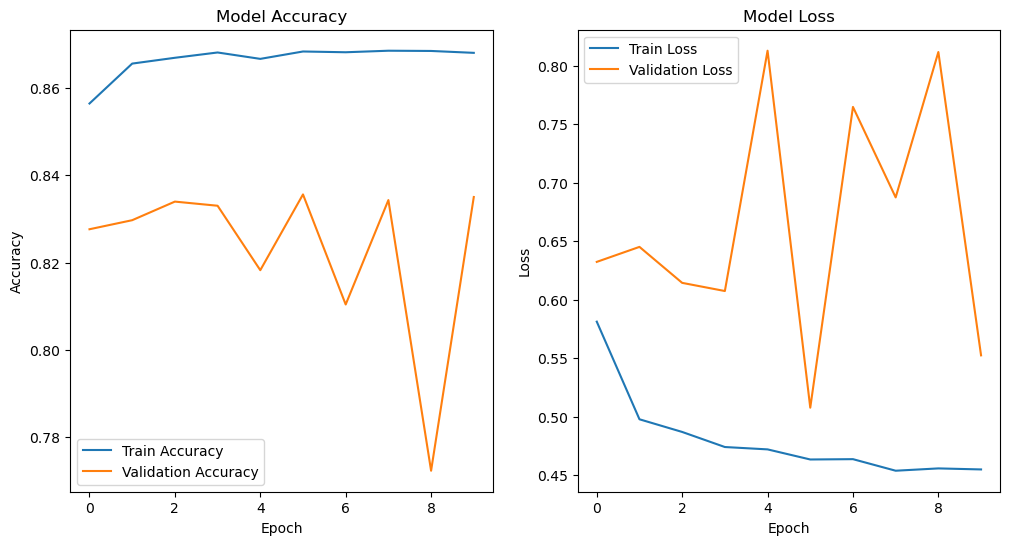

Training history plot is saved.


In [3]:
def plot_training_history(df):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(metrics['Train Accuracy'], label='Train Accuracy')
    plt.plot(metrics['Validation Accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(metrics['Train Loss'], label='Train Loss')
    plt.plot(metrics['Validation Loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Save the plot as a PNG file
    plt.savefig('../results/metrics.png')
    plt.show()

# Call the function to plot and save the training history
plot_training_history(metrics)

print("Training history plot is saved.")

In [4]:
test_image_path = '../data/patch/test/images/patch_430.0.tif'  
test_mask_path = '../data/patch/test/labels/patch_430.0.tif'
predicted_mask_path = '../results/prediction/predicted_mask.tif'
reconstructed_path = '../results/prediction/reconstructed_image.tif'

test_image = tiff.imread(test_image_path)
test_image = test_image[..., [2, 1, 0]]
test_image_norm  = (test_image - test_image.min()) / (test_image.max() - test_image.min())
test_mask = tiff.imread(test_mask_path)
predicted_mask = tiff.imread(predicted_mask_path)
reconstructed = tiff.imread(reconstructed_path)

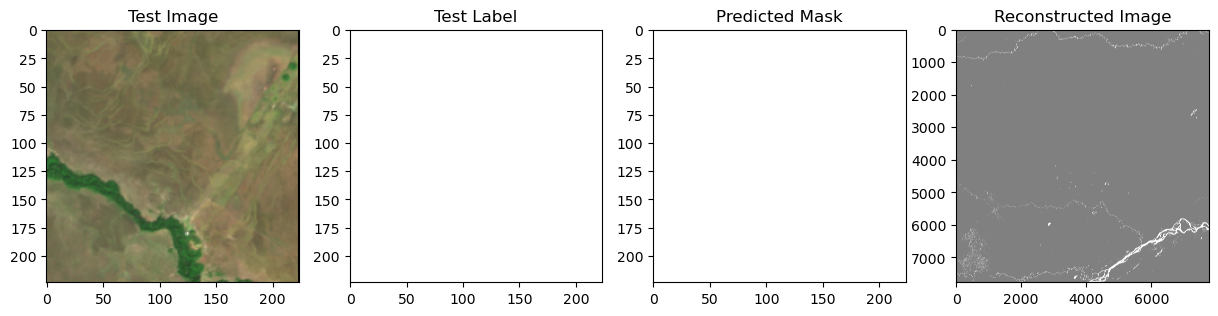

In [5]:
# Display the test image, the test label, and the predicted mask
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(test_image_norm) 
plt.title('Test Image')

plt.subplot(1, 4, 2)
plt.imshow(test_mask, cmap='gray')
plt.title('Test Label')

plt.subplot(1, 4, 3)
plt.imshow(predicted_mask, cmap='gray')
plt.title('Predicted Mask')

plt.subplot(1, 4, 4)
plt.imshow(reconstructed, cmap='gray')
plt.title('Reconstructed Image')

plt.show()

In [6]:
image_path = '../data/input/image_s2.tif'  

In [7]:
image = tiff.imread(image_path)
image = image[..., [2, 1, 0]]
image_norm  = (image - image.min()) / (image.max() - image.min())

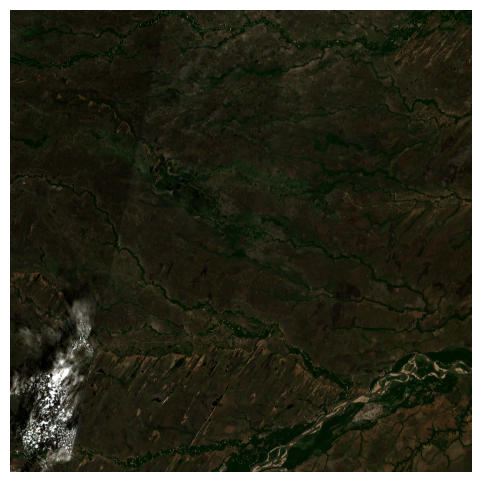

In [8]:
image = tiff.imread(image_path).astype(np.float32)
image = image[..., [2, 1, 0]]  # RGB

# Calcular percentiles de contraste
p2, p98 = np.percentile(image, (1, 99.9))
image_clip = np.clip(image, p2, p98)

# Normalizar al rango 0–1
image_norm = (image_clip - p2) / (p98 - p2)

plt.figure(figsize=(6,6))
plt.imshow(image_norm)
plt.axis("off")
plt.show()